# Pymaceuticals Inc.
---

### Analysis

- Based on the data, we can see that Capomulin had the highest number of observed mouse timepoints, whereas propriva had the least. The study was almost equal with male versus female participants, with a 51/49 split in favor of male mice. We can observe that, when using Capomulin, mice continue to have their tumors grow until around 20 days into the usage before a steady decline, barring a slight relapse of the tumor around 25-30 days into the process. 
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
mice_quantity = combined_data["Mouse ID"].nunique()

mice_quantity

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicate_mice


array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989", :]

duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the clean DataFrame.

clean_mice_quantity = clean_data["Mouse ID"].nunique()

clean_mice_quantity

248

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume_by_regimen = clean_data.groupby("Drug Regimen")

tumor_volume_by_regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
variance = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
standard_dev = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
standard_err = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.

tumor_summary_data = pd.DataFrame({"Average": mean, "Median": median, "Variance": variance, "Standard Dev.": standard_dev, "Standard Err.": \
                                   standard_err})

tumor_summary_data

,Average,Median,Variance,Standard Dev.,Standard Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregate = clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_aggregate


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

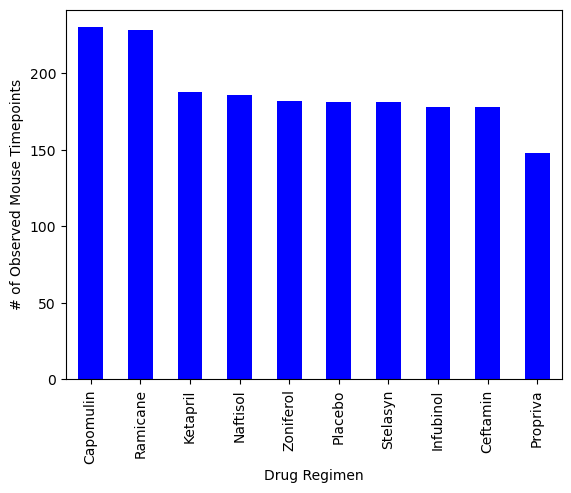

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_data["Drug Regimen"].value_counts()

barplot_pandas = mice_count.plot.bar(color='blue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

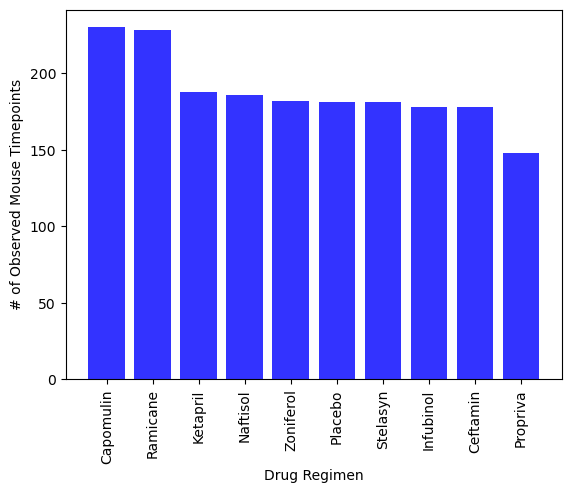

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

# Create bar plot

plt.bar(x_axis, y_axis, color='blue', alpha=0.8, align='center')

# Create labels for bar plot

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 'vertical')


<Axes: ylabel='count'>

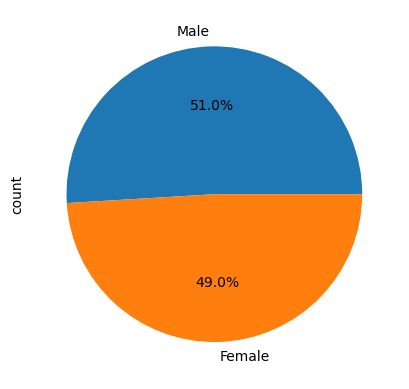

In [38]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender_data = clean_data["Sex"].value_counts()

# Make the pie chart

mice_gender_data.plot.pie(autopct= "%1.1f%%")

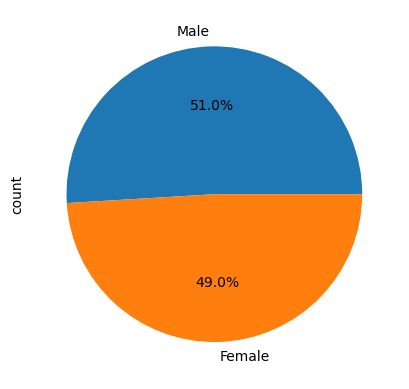

In [39]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender_data = clean_data["Sex"].value_counts()

# Make the pie chart
labels = ['Female', 'Male']
sizes = [49.6, 50.4]
plot = mice_gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
ramicane_data = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
infubinol_data = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [53]:
# Start by getting the last (greatest) timepoint for each mouse


max_timepoint_data = clean_data.groupby(['Mouse ID'])['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = pd.merge(clean_data, max_timepoint_data, on='Mouse ID')



In [73]:

# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
                 
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_regimens:

# Locate the rows which contain mice on each drug and get the tumor volumes

    last_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]==drug,"Tumor Volume (mm3)"]


# add subset

    tumor_vol_data.append(last_tumor_vol)

 
# Determine outliers using upper and lower bounds

quartiles = last_tumor_vol.quantile([0.25, 0.5, 0.75])
first_quartile = quartiles[0.25]
third_quartile = quartiles[0.75]
IQR = third_quartile - first_quartile
lower_bound = first_quartile - (1.5 * IQR)
upper_bound = third_quartile + (1.5 * IQR)

outliers = last_tumor_vol.loc[(last_tumor_vol < lower_bound) & (last_tumor_vol > upper_bound)]
print(f"{drug}'s potential outliers: {outliers}")

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 0, 'Drug Regimen')

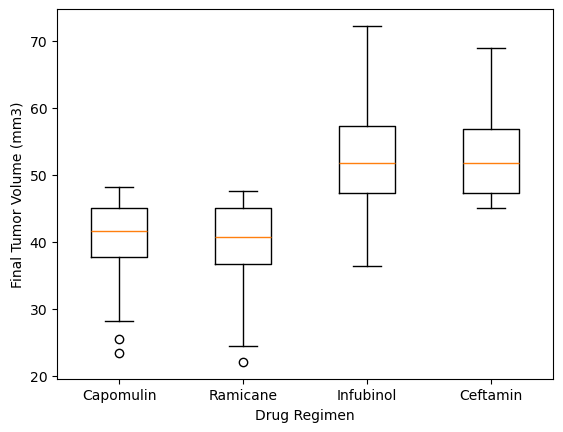

In [74]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=drug_regimens)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

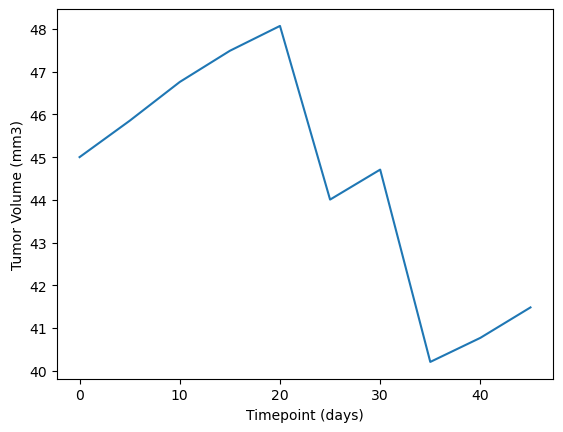

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_info = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_info[capomulin_info["Mouse ID"] == "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")




Text(0, 0.5, 'Average Tumor Volume (mm3)')

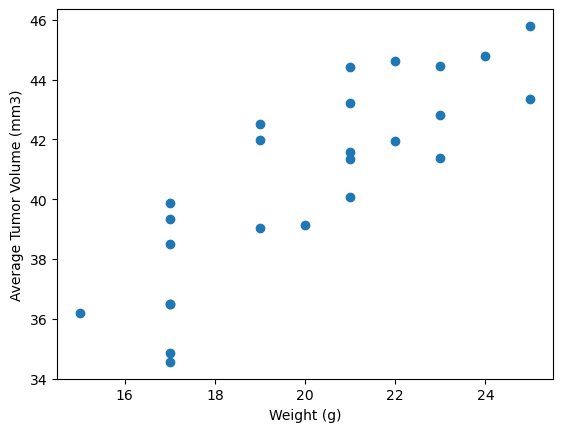

In [79]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_info = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = capomulin_info.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
merged_capomulin_info = pd.merge(avg_tumor_vol, capomulin_info[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')
plt.scatter(merged_capomulin_info['Weight (g)'], merged_capomulin_info['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

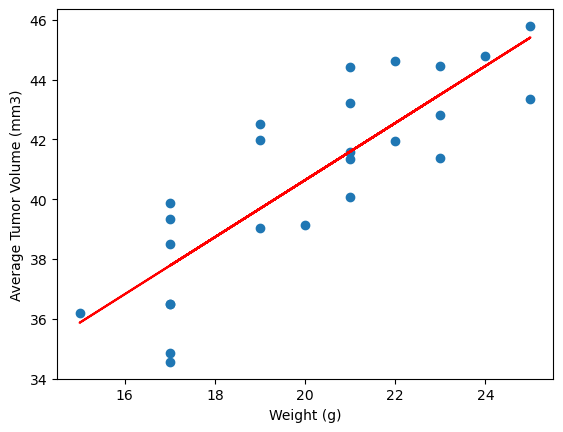

In [85]:
# import linregress

from scipy.stats import linregress

# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


weight = merged_capomulin_info['Weight (g)']
tumor_vol = merged_capomulin_info['Tumor Volume (mm3)']

correlation_coefficient = weight.corr(tumor_vol)
rounded_corr_coefficient = round(correlation_coefficient, 2)
print(f"The correlation between mouse weight and the average tumor volume is: {rounded_corr_coefficient}")

slope, intercept, r_value, p_value, std_err = linregress(weight, tumor_vol)
plt.scatter(weight, tumor_vol, label='Data')
regression_line = slope * weight + intercept
plt.plot(weight, regression_line, color='red', label='Linear Regression')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')



